In [7]:
import pandas as pd
import seaborn as sns
from scipy import stats

sns.set(style="whitegrid")

In [8]:
df = pd.read_csv('evaluation.csv')
df.head()

,Creator,Talk number,Overall Talk Quality,Powerpoint Quality
0,H,1,4,4
1,G,2,4,5
2,H,3,3,3
3,G,4,5,4
4,H,5,4,4


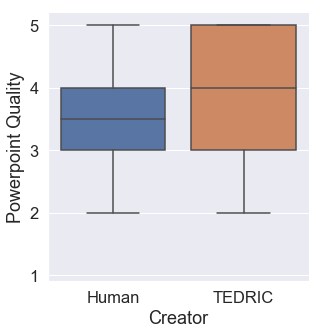

In [22]:
df = df.replace('H', 'Human')
df = df.replace('G', 'TEDRIC')

sns.set(font_scale=1.5)

g = sns.catplot(x="Creator",
                y="Powerpoint Quality", 
                kind='box',
                data=df)

axes = g.axes
axes[0,0].set_ylim(0.9,5.2)

# Save
g.savefig("powerpoint_quality_boxplot.png") 
g.savefig("powerpoint_quality_boxplot.eps") 

In [34]:
sns.set(font_scale=1.8)

# print(df)

sns.plt.xlim(1,5)
g= sns.catplot(x="Powerpoint Quality",hue="Creator",  kind="count", data=df);

# axes = g.axes
# axes[0,0].set_xlim(1,5)

# Save
g.savefig("powerpoint_quality_histogram.png") 
g.savefig("powerpoint_quality_histogram.eps") 

AttributeError: module 'seaborn' has no attribute 'plt'

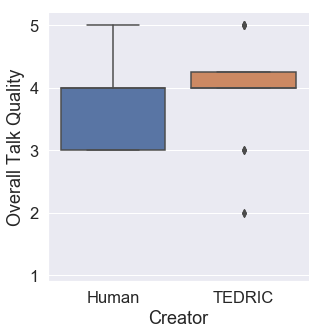

In [24]:
sns.set(font_scale=1.5)

g = sns.catplot(x="Creator",
                y="Overall Talk Quality", 
                kind='box',
                data=df)

axes = g.axes
axes[0,0].set_ylim(0.9,5.2)

# Save
g.savefig("overall_talk_quality_boxplot.png") 
g.savefig("overall_talk_quality_boxplot.eps") 

In [16]:
human = df.loc[df['Creator'] == 'Human']['Powerpoint Quality']
tedric = df.loc[df['Creator'] == 'TEDRIC']['Powerpoint Quality']
stat, p = stats.ttest_ind(human, tedric)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=-2.127, p=0.039
Different distribution (reject H0)


In [14]:
## MannWhitney Test

stat, p = stats.mannwhitneyu(human, tedric)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=192.500, p=0.020
Different distribution (reject H0)


In [21]:
print(len(human))

stat, p = stats.wilcoxon(human, tedric)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

24
Statistics=39.000, p=0.069
Same distribution (fail to reject H0)


In [69]:
df_raw = pd.read_csv('raw_data.csv')
df_raw.head()
df_raw['Creator'] = df['Creator']

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


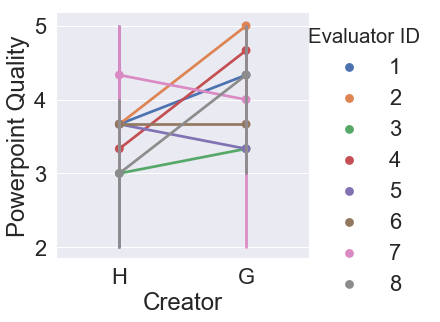

In [72]:
sns.catplot(x="Creator", y="Powerpoint Quality", 
            hue="Evaluator ID", kind="point", 
            data=df_raw);